In [ ]:
import tensorflow as tf

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#define the path and split your data into traning and validation split
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/flower_photos")
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/flower_photos",
    validation_split = 0.2,
    subset="training",
    seed=123)
ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/flower_photos",
    validation_split = 0.2,
    subset="validation",
    seed=123)

Found 3670 files belonging to 5 classes.
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
#define the batch size and print the image labels
import tensorflow_datasets as tfds

batch_size = 64

dataset_name = dataset
class_names = dataset.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
#resize your images and standardize your data to make it for a neural network
#Standardize your data
size = (512,512)
ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_val = ds_validation.map(lambda image, label: (tf.image.resize(image, size), label))

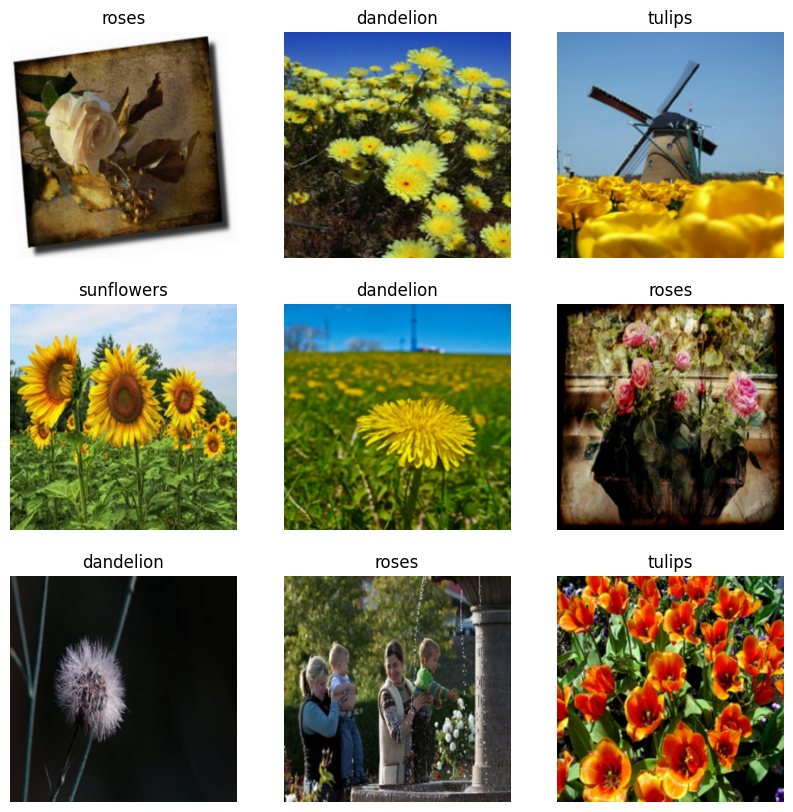

In [ ]:
#display the first 9 images
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in ds_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#do further preprocessing to increase the instances of images
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


image = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(height_factor=(-0.2, -0.3), width_factor=(-0.2,-0.3), interpolation='bilinear'),
        layers.RandomContrast(factor=0.1),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    ],
    name="image",
)

<ipython-input-8-717000605bc9>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.int(x)


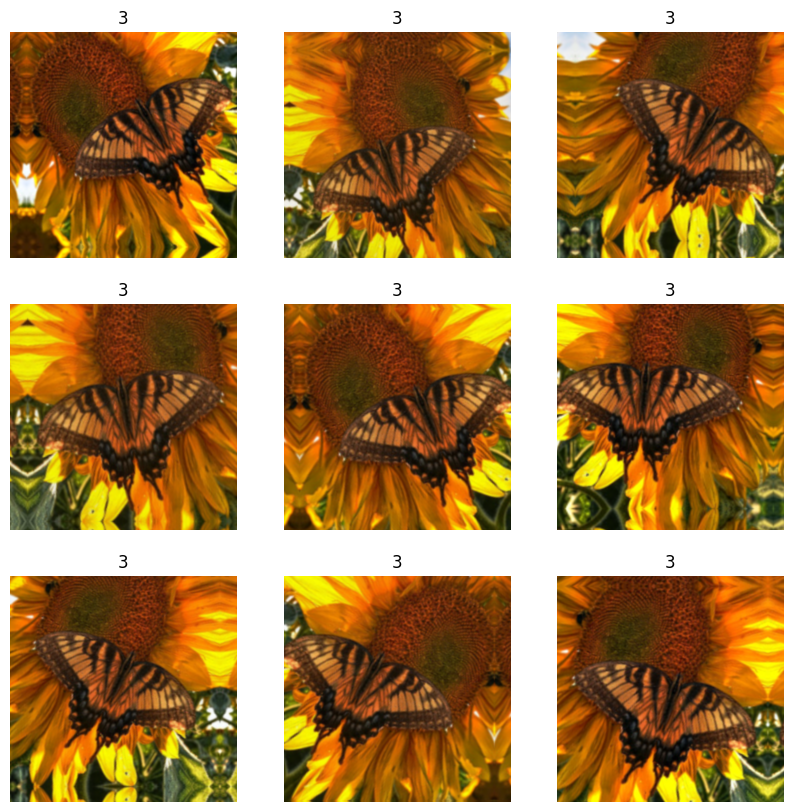

In [ ]:
#Understand again
import numpy as np

for images, labels in ds_train.take(1):
  plt.figure(figsize=(10,10))
  first_image= images[0]
  def f(x):
    return np.int(x)
  f2 = np.vectorize(f)
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    augmented_image = image(
        tf.expand_dims(first_image, 0), training = True
    )
    plt.imshow(augmented_image[0].numpy().astype("int32"))
    plt.title(f2(labels[0]))
    plt.axis("off")